In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | birpur
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | uyuni
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | kawalu
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | basco
Processing Record 22 of Set 1 | iralaya
Processing Record 23 of Set 1 | talcahua

Processing Record 36 of Set 4 | marshfield
Processing Record 37 of Set 4 | kabare
Processing Record 38 of Set 4 | severnoye
Processing Record 39 of Set 4 | casa grande
Processing Record 40 of Set 4 | adrar
Processing Record 41 of Set 4 | dauphin
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | campos novos
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | el angel
Processing Record 46 of Set 4 | sabzevar
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | sur
Processing Record 49 of Set 4 | verkhnevilyuysk
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | zhezkazgan
Processing Record 3 of Set 5 | ramhormoz
Processing Record 4 of Set 5 | san rafael
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | polunochnoye
Processing Record 7 of Set 5 | zhangye
Processing Record 8 of Set 5 | gilazi
City not found. Skipping...
Processing Record 9 

Processing Record 26 of Set 8 | merritt
Processing Record 27 of Set 8 | roebourne
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | port-cartier
Processing Record 30 of Set 8 | deputatskiy
Processing Record 31 of Set 8 | jibuti
Processing Record 32 of Set 8 | haibowan
City not found. Skipping...
Processing Record 33 of Set 8 | sanjwal
Processing Record 34 of Set 8 | ridgecrest
Processing Record 35 of Set 8 | bonthe
Processing Record 36 of Set 8 | townsville
Processing Record 37 of Set 8 | requena
Processing Record 38 of Set 8 | pitsunda
Processing Record 39 of Set 8 | dmytrivka
Processing Record 40 of Set 8 | forbes
Processing Record 41 of Set 8 | cruzeiro
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | trelew
Processing Record 44 of Set 8 | sawtell
Processing Record 45 of Set 8 | hiriyur
Processing Record 46 of Set 8 | alta floresta
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | urla
Processing Record 49 of

Processing Record 16 of Set 12 | konstantinovka
Processing Record 17 of Set 12 | puerto escondido
Processing Record 18 of Set 12 | samarai
Processing Record 19 of Set 12 | ambilobe
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | bolshaya chernigovka
City not found. Skipping...
Processing Record 22 of Set 12 | khomutovka
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | pala
Processing Record 25 of Set 12 | praia
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | itanhem
Processing Record 28 of Set 12 | arica
Processing Record 29 of Set 12 | venezuela
Processing Record 30 of Set 12 | mount gambier
Processing Record 31 of Set 12 | breves
Processing Record 32 of Set 12 | usuki
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 12 | farkhor
Processing Record 36 of Set 12 | san andres
Processing Record 37 of Set 12 | nalut
Proce

# DELETE Temporary Code Before Submitting
Only used to avoid recreating the csv file via API every time.

In [ ]:
#TEMPORARY ONLY
# File to Load
data_to_load = "weather_data/cities.csv"

# Read the data
city_data_df = pd.read_csv(data_to_load)
city_data_df.head(10)

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
#city_data_df = pd.DataFrame(city_data) --- reinstate this before submitting
#city_data_df.head(10) --- reinstate this before submitting

In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-11-22 21:34:02,-33.9258,18.4232,65.26,77,0,8.05
1,Ilulissat,GL,2022-11-22 21:37:08,69.2167,-51.1000,19.42,93,40,6.91
2,Birpur,IN,2022-11-22 21:37:08,26.5167,87.0167,62.58,69,4,3.98
3,Bambous Virieux,MU,2022-11-22 21:37:08,-20.3428,57.7575,73.22,88,20,4.61
4,Hermanus,ZA,2022-11-22 21:37:09,-34.4187,19.2345,58.80,75,92,7.56
5,Atuona,PF,2022-11-22 21:37:09,-9.8000,-139.0333,78.35,77,4,15.46
6,Punta Arenas,CL,2022-11-22 21:37:09,-53.1500,-70.9167,62.71,42,0,27.63
7,Busselton,AU,2022-11-22 21:37:09,-33.6500,115.3333,63.41,71,2,4.68
8,Uyuni,BO,2022-11-22 21:37:10,-20.4597,-66.8250,62.74,5,83,9.31
9,Srednekolymsk,RU,2022-11-22 21:37:10,67.4500,153.6833,-38.07,100,63,4.63


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

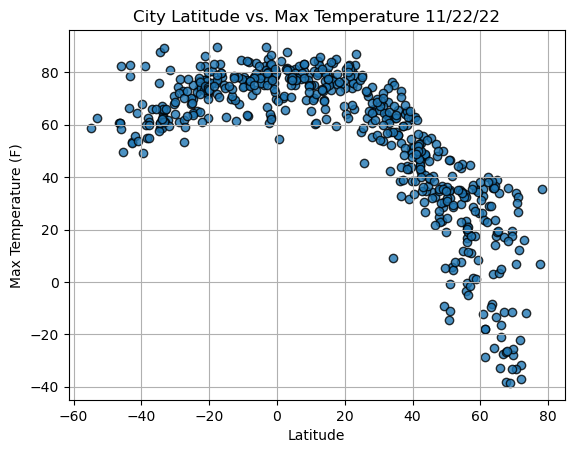

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

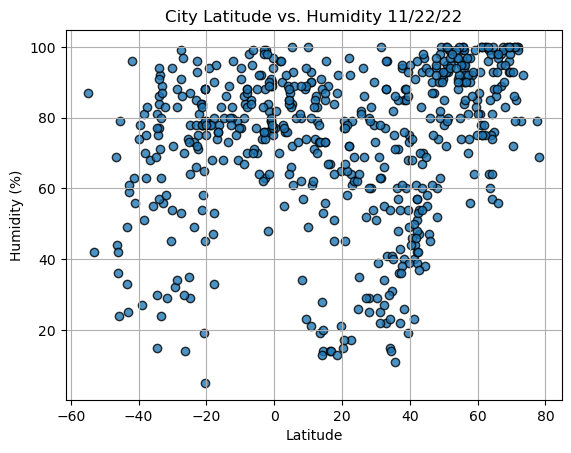

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

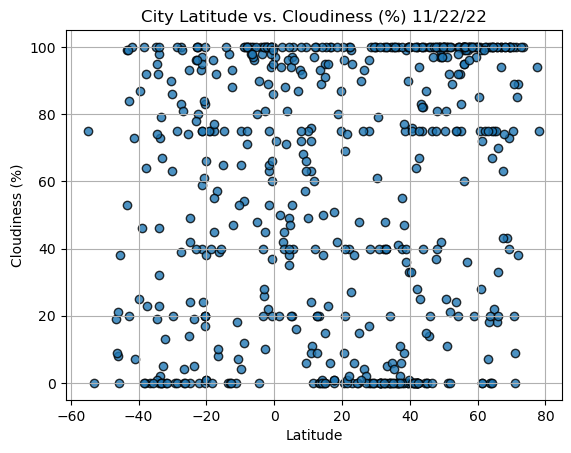

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

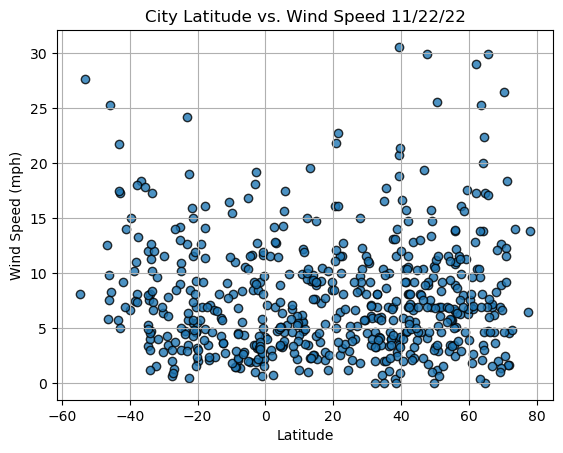

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear regression

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()